In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar los datos
file_path = 'data/data_cleaned.csv'
data = pd.read_csv(file_path)

# Explorar el dataset
print("Información del Dataset:")
print(data.info())
print("\nPrimeras filas del Dataset:")
print(data.head())

Información del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806 entries, 0 to 10805
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10806 non-null  object 
 1   Genero                      10806 non-null  object 
 2   Casado                      10806 non-null  object 
 3   Edad                        10806 non-null  int64  
 4   Graduado                    10806 non-null  object 
 5   Profesion                   10806 non-null  object 
 6   Experiencia laboral         10806 non-null  object 
 7   Gastoscore                  10806 non-null  object 
 8   Family_Size                 10806 non-null  int64  
 9   anno_nacimiento             10806 non-null  int64  
 10  Generacion                  10806 non-null  object 
 11  Ingresos anuales brutos     10806 non-null  int64  
 12  Provincia                   10806 non-null  object 
 13  Digita

In [2]:
# Clasificar las columnas automáticamente
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Dividir las numéricas en continuas y categóricas
numerical_continuous = []
numerical_categorical = []

for col in numerical_columns:
    if data[col].nunique() > 10:  # Más de 10 valores únicos, se considera continua
        numerical_continuous.append(col)
    else:
        numerical_categorical.append(col)

print("\nClasificación de las columnas:")
print(f"- Variables Numéricas Continuas: {numerical_continuous}")
print(f"- Variables Numéricas Categóricas: {numerical_categorical}")
print(f"- Variables Categóricas: {categorical_columns}")


Clasificación de las columnas:
- Variables Numéricas Continuas: ['Edad', 'anno_nacimiento', 'Ingresos anuales brutos', 'Dias_cliente', 'Edad_original_recalculated']
- Variables Numéricas Categóricas: ['Family_Size', 'Gasto_medio_mensual_cuota', 'Abandono', 'Campanna_transformada']
- Variables Categóricas: ['ID', 'Genero', 'Casado', 'Graduado', 'Profesion', 'Experiencia laboral', 'Gastoscore', 'Generacion', 'Provincia', 'Digital_encuesta', 'Age_Group']



Varianza explicada por cada componente principal:
PC1: 66.95%
PC2: 20.03%


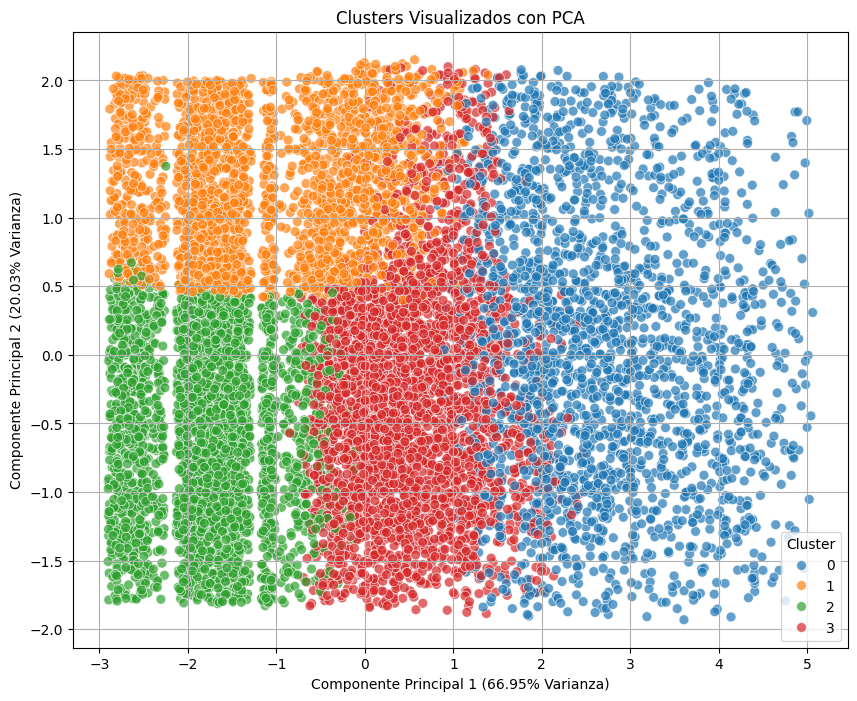

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el CSV con los clusters generados
csv_path = 'data/clustered_data.csv'  # Ruta del archivo guardado previamente
data_with_clusters = pd.read_csv(csv_path)

# Verificar que la columna 'Cluster' está presente
if 'Cluster' not in data_with_clusters.columns:
    raise ValueError("El archivo cargado no contiene la columna 'Cluster'. Asegúrate de haber guardado el CSV correctamente.")

# Seleccionar columnas numéricas para PCA
numerical_columns = ['Edad', 'anno_nacimiento', 'Ingresos anuales brutos', 'Dias_cliente', 'Edad_original_recalculated']
data_cleaned = data_with_clusters[numerical_columns]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned)

# Aplicar PCA
n_components = 2  # Reducir a 2 componentes principales para visualización
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)

# Crear un DataFrame con las componentes principales y etiquetas de cluster
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data_with_clusters['Cluster']

# Varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
print("\nVarianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var*100:.2f}%")

# Visualización de PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='tab10', s=50, alpha=0.7)
plt.title('Clusters Visualizados con PCA')
plt.xlabel(f'Componente Principal 1 ({explained_variance[0]*100:.2f}% Varianza)')
plt.ylabel(f'Componente Principal 2 ({explained_variance[1]*100:.2f}% Varianza)')
plt.grid(True)
plt.show()
